In [1]:
import numpy as np
import pandas as pd
# Ignoring the Harmless Warnings
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from pmdarima import auto_arima

<font color=red> <b> Importing the Data containing footfall of the customers in 4 restaurants along with the details of the holidays

In [6]:
resto = pd.read_csv("Data/RestaurantVisitors.csv", index_col='date', parse_dates=True)


In [7]:
resto.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


<font color =green> <b> Holiday is a Exogeneous Variable in the Data set

In [8]:
resto.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [9]:
# Dropping the Missing Data

resto1 = resto.dropna()
resto1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


<font color = blue> <b> Changing the variable Data type from Float to Integer

In [10]:
resto1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [11]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [12]:
for column in cols:
    resto1[column] = resto1[column].astype(int)

In [13]:
resto1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


<AxesSubplot:xlabel='date'>

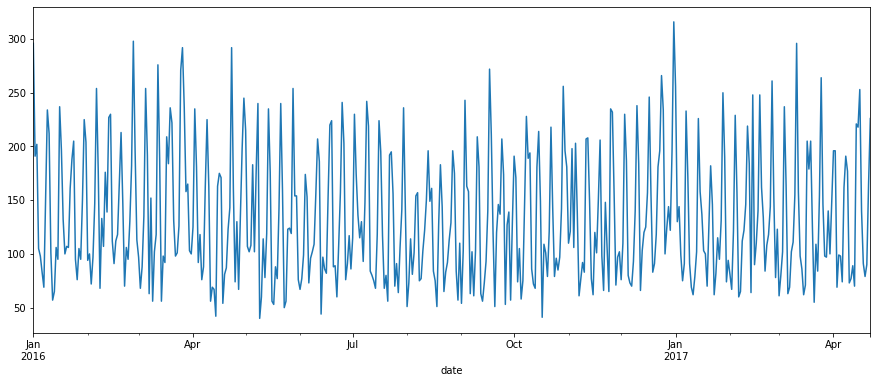

In [16]:
# Plotting the Total Footfall

resto1['total'].plot(figsize=(15,6))

<font color = blue> <b> Plotting the Daily Total Footfall along with the Holiday to see the seasonality 

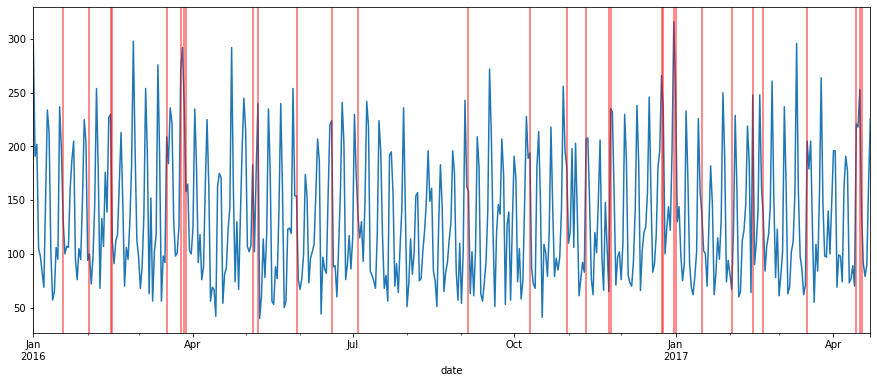

In [25]:
ax = resto1['total'].plot(figsize=(15,6))

# Plotting the Holiday along with the above graph
for day in resto1.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.6)   # axvline: To plot the Verticle Line

<font color = green> <b> From the Above plot we can see that Holiday is effecting the Footfall in the restaurants. But it is still unclear if this variable Holdays is predictive for how many visitors will be there in the restaurant

<font color =  blue> <b> We will check and confirm the seasonality by ETS decomposition

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

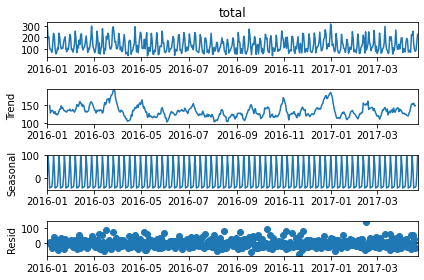

In [27]:
result = seasonal_decompose(resto1['total'])
result.plot();

<AxesSubplot:xlabel='date'>

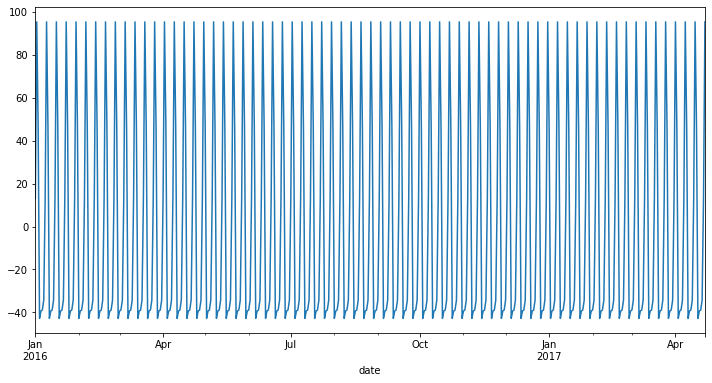

In [28]:
# Ploting the seasonal Component

result.seasonal.plot(figsize=(12,6))

<font color = green> <b> From the the above plot we can confirm there is seasonality in the data and it is weekly

### <font color = red> First we will fit the simple SARIMA Model to our Data Set

<font color = blue> <b> Train-test Split

In [29]:
len(resto1)

478

In [30]:
train = resto1.iloc[:436]
test = resto1.iloc[436:]

In [32]:
# APplying Auto Arima to know the p, d, q component of Trend and Seasonality

auto_arima(resto1['total'], seasonal=True, m=7, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=0.88 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=5333.149, Time=0.74 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4816.580, Time=0.56 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.27 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4952.376, Time=0.93 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.44 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4772.347, Time=0.50 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2382.174
Date:                   Tue, 19 Jan 2021   AIC                           4772.347
Time:                           20:59:15   BIC                           4789.025
Sample:                                0   HQIC                          4778.904
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3703      1.666      2.622      0.009       1.104       7.637
ar.S.L7        0.9659      0.012     78.681      0.000       0.942       0.990
ma.S.L7       -0.7236      0.051    -14.137      0.000      -0.824      -0.623
sigma2      1257.8216     76.628     16.415      0.000    1107.633    1408.010
===================================================================================
Ljung-Box (L1) (Q):                  14.43   Jarque-Bera (JB):                58.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.70
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color = blue> <b> Fiiting the Model and Predicting for test data

In [33]:
model =  SARIMAX(train['total'], order=(0,0,0), seasonal_order=(1,0,1,7))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [34]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Tue, 19 Jan 2021   AIC                           4336.738
Time:                           21:04:56   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.198      0.000      -0.985      -0.891
sigma2      1111.8052     58.738     18.928      0.000     996.680    1226.930
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
start = len(train)
end = len(train) + len(test) -1

In [36]:
predictions = results.predict(start,end).rename("SARIMA Model")

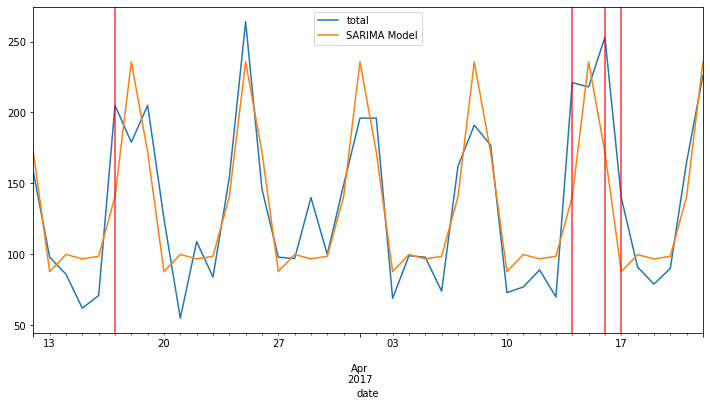

In [39]:
# Plotting the Actual vs Predicted Values
ax = test['total'].plot(figsize=(12,6), legend=True)
predictions.plot(legend=True)

for day in resto1.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)

<font color = green> <b> We can se from the above Plot that Model was not  able to predict correctly for the days with the holiday.

In [41]:
# Evaluating the Model Quantitatively

from statsmodels.tools.eval_measures import rmse, rmspe

print("RMSE of the Model is:", rmse(test['total'],predictions) )
print("RMSPE of the Model is:", rmspe(test['total'],predictions))
print("The Mean of visitors in Test Data is:", test['total'].mean())


RMSE of the Model is: 31.913882348270587
RMSPE of the Model is: 2.5756186178423723
The Mean of visitors in Test Data is: 134.26190476190476


<font color=green> <b> By Comparing the RMSE of the predicting values and Mean of the Actual Values, we can se the Simple SARIMA model is not predicting correctly. 

### <font color = red> Now We will include the Exogeneous Variable and Predict and Forecast Using SARIMAX model

In [44]:
resto1[['holiday']].head()

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0


In [45]:
# Checking if the component of the model are same after Icluding the Exogeneous variable
# For X: (exogeneous Variable), statsmodel will take DataFrame as a Input
auto_arima(resto1['total'], X = resto1[['holiday']], seasonal=True, m=7, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5235.582, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4786.350, Time=0.62 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=4969.638, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6068.575, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5171.193, Time=0.22 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4724.445, Time=0.61 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=4990.373, Time=0.42 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4817.803, Time=0.93 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4887.554, Time=0.69 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4865.615, Time=0.56 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=5161.219, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2356.222
Date:                             Tue, 19 Jan 2021   AIC                           4724.445
Time:                                     21:50:46   BIC                           4749.462
Sample:                                 01-01-2016   HQIC                          4734.280
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.9607      3.068      5.202      0.000       9.947      21.974
holiday       45.6326      4.446     10.264      0.000      36.919      54.347
ar.L1          0.1170      0.048      2.415      0.016       0.022       0.212
ar.S.L7        0.8730      0.023     37.833      0.000       0.828       0.918
ma.S.L7       -0.3163      0.056     -5.664      0.000      -0.426      -0.207
sigma2      1118.8200     80.218     13.947      0.000     961.596    1276.044
===================================================================================
Ljung-Box (L1) (Q):                   1.68   Jarque-Bera (JB):                 4.92
Prob(Q):                              0.20   Prob(JB):                         0.09
Heteroskedasticity (H):               0.91   Skew:                             0.22
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color = green> <b> After Including the Exogeneour Variable, the Order of p, d, q and P, D, Q are changed as compare to the SARIMAX model withour the 'X'

### <font color = red> Train and FIT our SARIMAX Model

In [46]:
model1 =  SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,0), seasonal_order=(1,0,1,7))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [47]:
results_X =  model1.fit()

In [48]:
results_X.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.062
Date:                             Wed, 20 Jan 2021   AIC                           4188.124
Time:                                     18:57:08   BIC                           4208.512
Sample:                                 01-01-2016   HQIC                          4196.170
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.5061      3.763     18.203      0.000      61.130      75.882
ar.L1          0.2115      0.044      4.805      0.000       0.125       0.298
ar.S.L7        0.9999   9.02e-05   1.11e+04      0.000       1.000       1.000
ma.S.L7       -0.9460      0.023    -41.601      0.000      -0.991      -0.901
sigma2       783.4330     45.150     17.352      0.000     694.941     871.925
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.24
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.23
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
predictions_X = results_X.predict(start,end, exog= test[['holiday']]).rename("SARIMAX - With Exog. Variable")

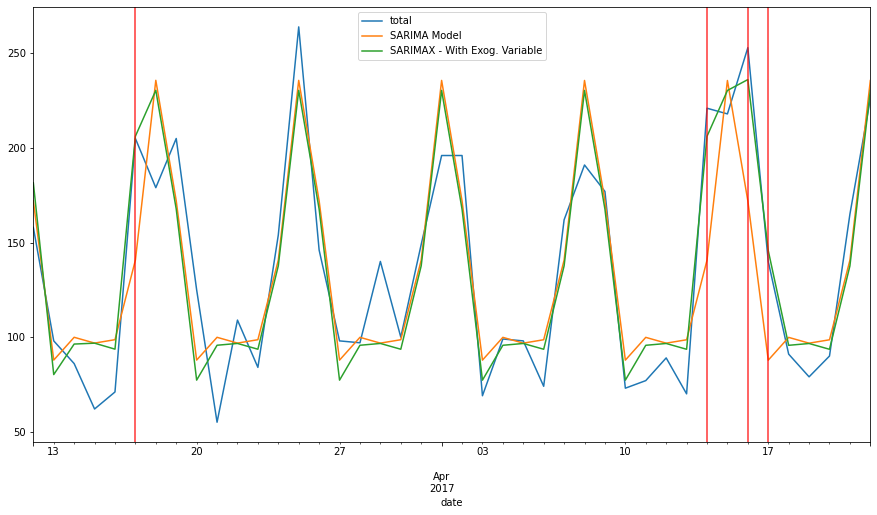

In [53]:
# Plotting the Actual vs Predicted Values
ax = test['total'].plot(figsize=(15,8), legend=True)
predictions.plot(legend=True)
predictions_X.plot(legend=True)

for day in resto1.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)

<font color = green> <b> We can now see the Model is prediction more accurately for the Days with Holidays as Compare to the normal SARIMA model

In [1]:
# Evaluating the Model Quantitatively

from statsmodels.tools.eval_measures import rmse, rmspe

print("RMSE of the Model is:", rmse(test['total'],predictions_X) )
print("RMSPE of the Model is:", rmspe(test['total'],predictions_X))
print("The Mean of visitors in Test Data is:", test['total'].mean())


NameError: name 'test' is not defined

###  <font color = Red> Forcaating for the Future Values

In [56]:
modelF = SARIMAX(resto1['total'],exog=resto1[['holiday']], order=(1,0,0), seasonal_order=(1,0,1,7))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [57]:
resultsF = modelF.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
exog_Forecast = resto[478:][['holiday']]

In [62]:
len(exog_Forecast)

39

In [63]:
fcast_X = resultsF.predict(len(resto1), len(resto1)+38, exog= exog_Forecast).rename("FINAL SARIMAX Forecast")

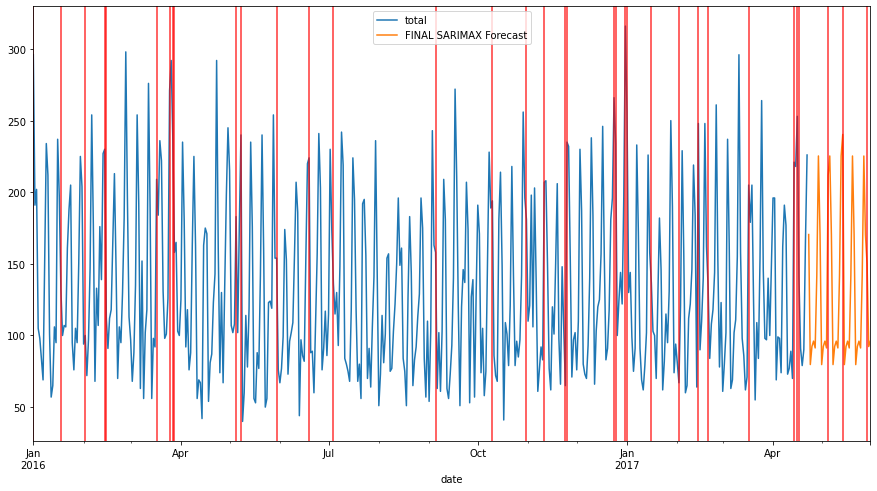

In [64]:
# Plotting the Actual vs Predicted Values
ax = resto1['total'].plot(figsize=(15,8), legend=True)
fcast_X.plot(legend=True)

for day in resto.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)

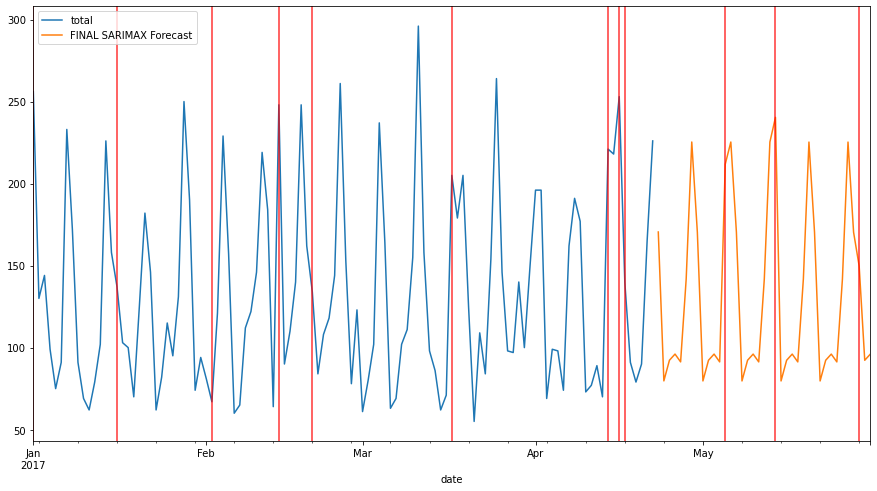

In [65]:
# Plotting the Actual vs Predicted Values
ax = resto1['total'].loc['2017-01-01':].plot(figsize=(15,8), legend=True)
fcast_X.plot(legend=True)

for day in resto.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)